In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
companies = pd.read_csv('companies_clean.csv')

In [3]:
companies.drop(columns=['NAME','RCPSZFI','us','YIBSZFI','FIRMPDEMP_S','RCPPDEMP_S','EMP_S','PAYANN_S'], inplace=True)

In [4]:
companies['payroll_revenue_ratio'] = companies['PAYANN'] / companies['RCPPDEMP']

In [5]:
companies['average_pay'] = (companies['PAYANN'] / companies['EMP'])

In [6]:
companies['average_pay_revenue_percent'] = (companies['average_pay'] / companies['RCPPDEMP']) * 100

In [7]:
no_demo = companies[(companies['SEX_LABEL'] == 'Total') & (companies['ETH_GROUP_LABEL'] == 'Total') & (companies['RACE_GROUP_LABEL'] == 'Total') & (companies['VET_GROUP_LABEL'] == 'Total')]

In [8]:
ages = no_demo[(no_demo['EMPSZFI_LABEL']=='All firms') & (no_demo['NAICS2017_LABEL']=='Total for all sectors') & (no_demo['BUSCHAR_LABEL'] == 'All firms') & (no_demo['RCPSZFI_LABEL'] =='All firms')]

In [9]:
industries = no_demo[(no_demo['NAICS2017_LABEL'] != 'Total for all sectors') & (['NAICS2017_LABEL'] != 'Industries not classified')]

In [10]:
industries = industries[(industries['YIBSZFI_LABEL']=='All firms') & (industries['EMPSZFI_LABEL']=='All firms') & (industries['BUSCHAR_LABEL'] == 'All firms')]

In [11]:
industries.drop(columns=['QDESC_LABEL','BUSCHAR_LABEL','RCPSZFI_LABEL','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','YIBSZFI_LABEL','EMPSZFI_LABEL','RCPPDEMP','payroll_revenue_ratio','average_pay_revenue_percent'], inplace=True)

In [12]:
industries.drop_duplicates(inplace=True)

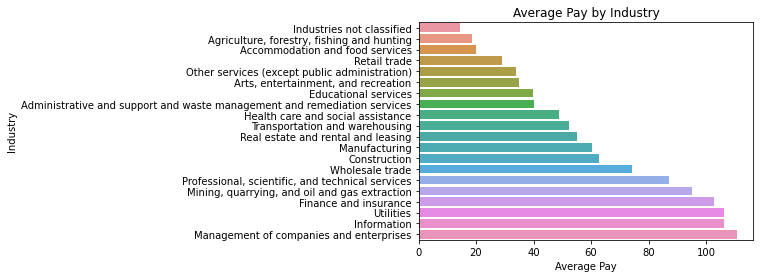

In [13]:
ax = sns.barplot(y='NAICS2017_LABEL',data=industries, x='average_pay',order=industries.sort_values('average_pay')['NAICS2017_LABEL'])
ax.set(xlabel='Average Pay',ylabel='Industry',title='Average Pay by Industry');

In [23]:
# Do age of businesses affect average pay?
ages = no_demo[(no_demo['EMPSZFI_LABEL']=='All firms') & (no_demo['NAICS2017_LABEL']=='Total for all sectors') & (no_demo['BUSCHAR_LABEL'] == 'All firms') & (no_demo['RCPSZFI_LABEL'] =='All firms')]

In [25]:
ages.dropna(inplace=True)

In [26]:
to_drop =['NAICS2017_LABEL','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','RCPSZFI_LABEL','EMPSZFI_LABEL','QDESC_LABEL','BUSCHAR_LABEL']
ages.drop(columns = to_drop, inplace=True)

In [27]:
ages.drop_duplicates(inplace=True)

In [28]:
ages.drop(73, inplace=True)

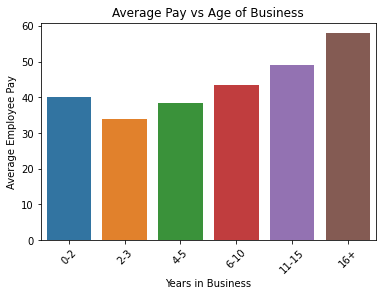

In [29]:
ax = sns.barplot(x='YIBSZFI_LABEL',data=ages, y='average_pay')
ax.set_xticklabels(labels = ['0-2','2-3', '4-5','6-10','11-15','16+'],rotation = 45)
ax.set(xlabel='Years in Business',ylabel='Average Employee Pay',title='Average Pay vs Age of Business');

In [30]:
# Do business sizes affect average pay?

sizes = no_demo[(no_demo['YIBSZFI_LABEL']=='All firms') & (no_demo['NAICS2017_LABEL']=='Total for all sectors') & (no_demo['BUSCHAR_LABEL'] == 'All firms') & (no_demo['RCPSZFI_LABEL'] =='All firms')]

In [31]:
sizes.dropna(inplace=True)

In [32]:
to_drop =['NAICS2017_LABEL','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','RCPSZFI_LABEL','YIBSZFI_LABEL','QDESC_LABEL','BUSCHAR_LABEL']
sizes.drop(columns = to_drop, inplace=True)

In [33]:
sizes.drop_duplicates(inplace=True)

In [34]:
filter_sizes = ["All firms"]
sizes = sizes[~sizes["EMPSZFI_LABEL"].isin(filter_sizes)]

In [35]:
sizes.sort_values(by='average_pay',inplace=True)

In [36]:

sizes = sizes.reindex([81,89,97,105,113,121,5,13,21])


In [37]:
sizes.reset_index(inplace=True,drop=True)

In [38]:
sizes.replace([np.inf, -np.inf], 0, inplace=True)

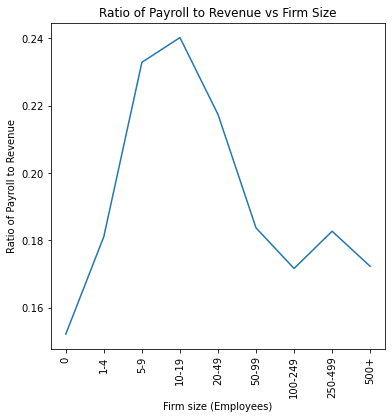

In [41]:
fig,ax = plt.subplots()
ax.plot(sizes['EMPSZFI_LABEL'],sizes['payroll_revenue_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Firm size (Employees)')
plt.ylabel('Ratio of Payroll to Revenue')
fig.set_size_inches(6,6)
plt.title('Ratio of Payroll to Revenue vs Firm Size')
plt.xticks(range(9),['0','1-4','5-9','10-19','20-49','50-99','100-249','250-499','500+']);


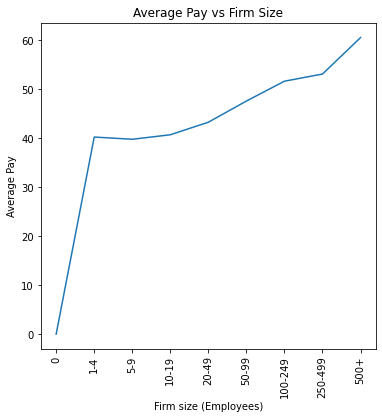

In [42]:
fig,ax = plt.subplots()
ax.plot(sizes['EMPSZFI_LABEL'],sizes['average_pay'])
plt.xticks(rotation=90)
plt.xlabel('Firm size (Employees)')
plt.ylabel('Average Pay')
fig.set_size_inches(6,6)
plt.title('Average Pay vs Firm Size')
plt.xticks(range(9),['0','1-4','5-9','10-19','20-49','50-99','100-249','250-499','500+']);